# Data Quality & Exploration

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../utils')

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from importlib import reload

from StormFormat import read_data, break_down_storm_history

reload(sys.modules['StormFormat'])

<module 'StormFormat' from '/home/programming/mars-dust/mars_dust/../utils/StormFormat.py'>

In [5]:
data = read_data('./MDAD.csv')

In [6]:
storm_id_col = 'member_id'
data = break_down_storm_history(data, column=storm_id_col)
data.columns = [str(i).lower().replace(' ', '_') for i in data.columns]
#data[storm_id_col] = data['storm_id_breakout']

In [7]:
data

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
0,29,B01,1,120.90,28.85,76.95000,9.035698e+04,B01_001,NaN,83.25,71.35,75,no,False,[B01_001],storm_id_list_0,B01_001
1,29,B01,2,121.40,29.65,74.25000,1.569251e+05,B01_001,NaN,81.95,66.85,50,no,False,[B01_001],storm_id_list_0,B01_001
2,29,B01,2,121.40,-117.05,-7.64999,3.503765e+04,B01_004,NaN,-5.45,-9.95,100,no,False,[B01_004],storm_id_list_0,B01_004
3,29,B01,3,121.80,36.05,71.75000,2.092571e+05,B01_001,NaN,77.45,64.75,50,no,False,[B01_001],storm_id_list_0,B01_001
4,29,B01,3,121.80,-146.55,77.65000,1.868985e+05,B01_006,NaN,84.25,70.05,50,no,False,[B01_006],storm_id_list_0,B01_006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159840,25,e06,18,197.54,91.55,-39.20000,7.206799e+06,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-13.10,-58.40,50,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_10,e06_001
159842,25,e06,19,198.12,76.75,-40.00000,4.599443e+06,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-18.70,-58.20,50,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_10,e06_001
159845,25,e06,20,198.70,77.85,-36.10000,3.022172e+06,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-22.00,-49.30,50,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_10,e06_001
174788,25,e06,12,194.07,73.95,-37.70000,1.343699e+07,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-10.90,-60.00,75,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_11,e06_019


In [9]:
days_existed = data.groupby(['member_id']) \
    .agg(days_existed=('sol', 'count')) \
    .sort_values('days_existed', ascending=False)

<AxesSubplot: ylabel='Frequency'>

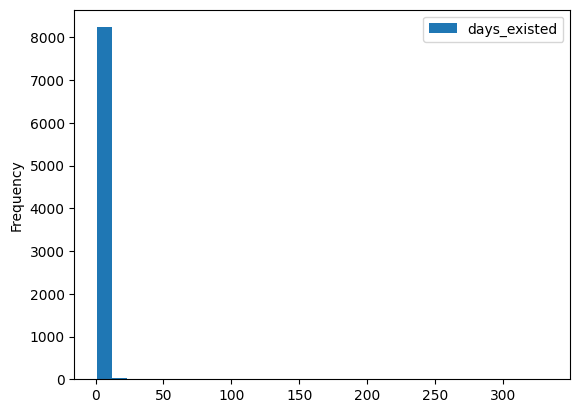

In [10]:
days_existed.plot(kind='hist', bins=30)

In [11]:
data.columns

Index(['mars_year', 'mission_subphase', 'sol', 'ls', 'centroid_longitude',
       'centroid_latitude', 'area_(square_km)', 'member_id', 'sequence_id',
       'maximum_latitude', 'minimum_latitude', 'confidence_interval',
       'missing_data', 'combined_storm', 'storm_ids', 'variable',
       'storm_id_breakout'],
      dtype='object')

In [581]:
# do any storms go across missions?
data.groupby(['member_id']) \
    .agg(mission_count=('mission_subphase', 'nunique')) \
    .query("mission_count > 1")
# there are 134 storms that go across missions

,mission_count
Member ID,
B01_016,2
B03_059,2
B03_071+072,2
B04_070,2
B05_085,2
...,...
s14_043,2
s15_038,2
s16_043,2


In [582]:
# number of years in database and sols
np.sort(
    data['mars_year'].unique()
)

array([24, 25, 26, 27, 28, 29, 30, 31, 32], dtype=int64)

In [583]:
# the number of unique storm IDs
data['member_id'].nunique()

8294

In [13]:
targets = ['centroid_longitude', 'centroid_latitude', 'area_(square_km)']
keys = ['member_id']
sub_keys = ['mars_year', 'sol']
data

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
0,29,B01,1,120.90,28.85,76.95000,9.035698e+04,B01_001,NaN,83.25,71.35,75,no,False,[B01_001],storm_id_list_0,B01_001
1,29,B01,2,121.40,29.65,74.25000,1.569251e+05,B01_001,NaN,81.95,66.85,50,no,False,[B01_001],storm_id_list_0,B01_001
2,29,B01,2,121.40,-117.05,-7.64999,3.503765e+04,B01_004,NaN,-5.45,-9.95,100,no,False,[B01_004],storm_id_list_0,B01_004
3,29,B01,3,121.80,36.05,71.75000,2.092571e+05,B01_001,NaN,77.45,64.75,50,no,False,[B01_001],storm_id_list_0,B01_001
4,29,B01,3,121.80,-146.55,77.65000,1.868985e+05,B01_006,NaN,84.25,70.05,50,no,False,[B01_006],storm_id_list_0,B01_006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159840,25,e06,18,197.54,91.55,-39.20000,7.206799e+06,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-13.10,-58.40,50,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_10,e06_001
159842,25,e06,19,198.12,76.75,-40.00000,4.599443e+06,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-18.70,-58.20,50,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_10,e06_001
159845,25,e06,20,198.70,77.85,-36.10000,3.022172e+06,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-22.00,-49.30,50,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_10,e06_001
174788,25,e06,12,194.07,73.95,-37.70000,1.343699e+07,e05_033+041+050+063+073+076+082+090+091+092+e0...,e05_01,-10.90,-60.00,75,yes,True,"[e05_033, e05_041, e05_050, e05_063, e05_073, ...",storm_id_list_11,e06_019


In [14]:
# sequence_ids are assigned to storms with length greater than 3 sols 
# these are assigned by SUB_XX where SUB is the submission ID of the storm and it's 
# relative sequence_id, which is just the continuation of a storm after it changed
# sequences can merge together with a +

# storms can break into multiple storms or multiple storms can merge together

In [15]:
storm_grps = data.groupby(keys)
storm_grps.get_group('s23_009')

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
14970,28,s23,8,117.9,-16.65,-19.9,71003.383,s23_009,NaN,-18.0,-21.4,50,no,False,[s23_009],storm_id_list_0,s23_009


In [16]:
data[data['member_id'].str.contains('B07_002')]

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
863,29,B07,2,220.8,-147.95,-60.95,115940.350,B07_002,NaN,-58.35,-63.05,100,no,False,[B07_002],storm_id_list_0,B07_002
871,29,B07,3,221.4,-152.95,-62.45,50158.277,B07_002,NaN,-59.75,-64.45,75,no,False,[B07_002],storm_id_list_0,B07_002


In [19]:
data[data['sequence_id'].fillna('').str.contains('3+')]

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
121,29,B02,15,141.8,-26.850000,23.55,241794.78,B02_042,B02_03,28.35,18.05,75,no,False,[B02_042],storm_id_list_0,B02_042
127,29,B02,16,142.2,-22.150000,25.95,642013.81,B02_042,B02_03,37.05,15.55,100,no,False,[B02_042],storm_id_list_0,B02_042
135,29,B02,17,142.7,-18.450000,23.75,653817.25,B02_042,B02_03,36.25,8.95,50,yes,False,[B02_042],storm_id_list_0,B02_042
144,29,B02,18,143.2,-11.650000,28.75,989336.12,B02_042,B02_03,41.85,11.55,75,no,False,[B02_042],storm_id_list_0,B02_042
145,29,B02,18,143.2,-32.050000,24.95,644664.19,B02_046,B02_03,33.75,14.65,75,no,False,[B02_046],storm_id_list_0,B02_046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126348,30,G14,18,348.7,-6.950000,-74.95,2195878.80,G14_024+025+026+035+037+039+040+041+043,G14_03,-63.15,-85.95,50,no,True,"[G14_024, G14_025, G14_026, G14_035, G14_037, ...",storm_id_list_8,G14_043
126354,30,G14,19,349.2,-2.950000,-76.35,2313681.50,G14_024+025+026+035+037+039+040+041+043,G14_03,-60.85,-85.75,50,no,True,"[G14_024, G14_025, G14_026, G14_035, G14_037, ...",storm_id_list_8,G14_043
126359,30,G14,20,349.7,-44.450000,-77.25,1431351.60,G14_024+025+026+035+037+039+040+041+043,G14_03,-66.05,-85.95,50,no,True,"[G14_024, G14_025, G14_026, G14_035, G14_037, ...",storm_id_list_8,G14_043
126362,30,G14,21,350.1,-36.550000,-72.85,1647640.00,G14_024+025+026+035+037+039+040+041+043,G14_03,-56.25,-84.95,50,no,True,"[G14_024, G14_025, G14_026, G14_035, G14_037, ...",storm_id_list_8,G14_043


In [20]:
data['sequence_id'].unique()

array([nan, 'B02_01', 'B02_02', 'B02_03', 'B03_01', 'B03_02', 'B03_03',
       'B03_04', 'B04_02', 'B04_01', 'B05_01', 'B06_02', 'B06_01',
       'B07_01', 'B07_03', 'B07_02', 'B07_04', 'B11_01', 'B11_02',
       'B12_01', 'B12_02', 'B16_01', 'B16_02', 'B17_01', 'B17_03',
       'B17_02', 'B17_04', 'B18_01', 'B18_02', 'B18_03', 'B19_01',
       'B19_02', 'B20_01', 'B22_01', 'D02_01', 'D02_02', 'D03_01',
       'D04_01', 'D04_03', 'D04_02', 'D04_04', 'D06_01', 'D07_01',
       'D08_01', 'D08_02', 'D11_01', 'D11_02', 'D11_03', 'D13_01',
       'D13_02', 'D13_03', 'D14_01', 'D14_02', 'D16_01', 'D16_03',
       'D16_02', 'D17_01', 'D17_05', 'D17_02', 'D17_04', 'D17_03',
       'D18_02', 'D18_03', 'D18_04', 'D18_01', 'D19_01', 'F02_01',
       'F03_02', 'F03_01', 'F03_03', 'F03_04', 'F04_01', 'F04_02',
       'G01_02', 'G01_03', 'G03_01', 'G03_03', 'G03_02', 'G03_04',
       'G04_01', 'G04_03', 'G04_02', 'G05_02', 'G05_01', 'G05_04',
       'G06_01', 'G06_02', 'G07_01', 'G07_02', 'G07_03', 

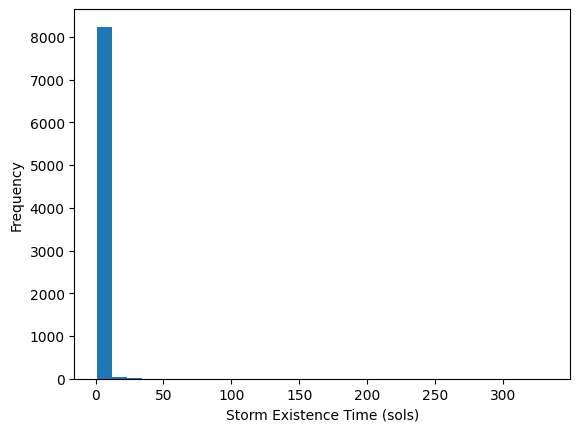

In [21]:
storm_grps.size().plot(kind='hist', bins=30)
plt.xlabel("Storm Existence Time (sols)")
plt.show()

In [22]:
storm_grps.size().mean()

2.105739088497709

In [23]:
# what are the range of sols in each martian year
data['sol'].max()

# since we only have a maximum of 37 sols per year, we need to treat this as a storm sequence
# rather than a time series problem
# each entry is a tracking a specific storm but I am not sure when the storms occur 

37

In [24]:
# apparently we are only tracking up to 30 days but we are not sure of when/where the actual sols are
# the length of a storm has to be across missions and across years and sols
data.groupby(['mars_year']).agg(min_sol=('sol', 'min'), max_sol=('sol', 'max'))

,min_sol,max_sol
mars_year,,
24,1,37
25,1,32
26,1,32
27,1,32
28,1,33
29,1,33
30,1,34
31,1,33
32,1,34


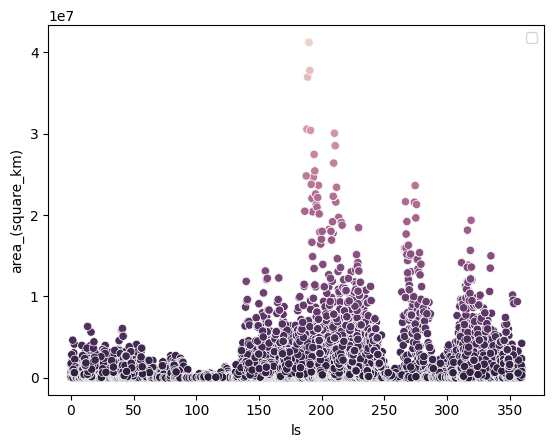

In [26]:
sns.scatterplot(
    data=data[['ls', 'area_(square_km)']], 
    x='ls', 
    y='area_(square_km)', 
    hue=-data['area_(square_km)']
    )
plt.legend([])

# Data Cleaning to do

- Get the individual storms out of what are combined together to show one storm's complete history
- Treat the storms that spin off of existing storms as new storms
- Should I bring storm predictions together after they merge?
  - Does storm direction/momentum change after combination?
- How far ahead should I predict?

# Seasonality

Text(0.5, 1.0, 'Size of Storm Across Mission sols')

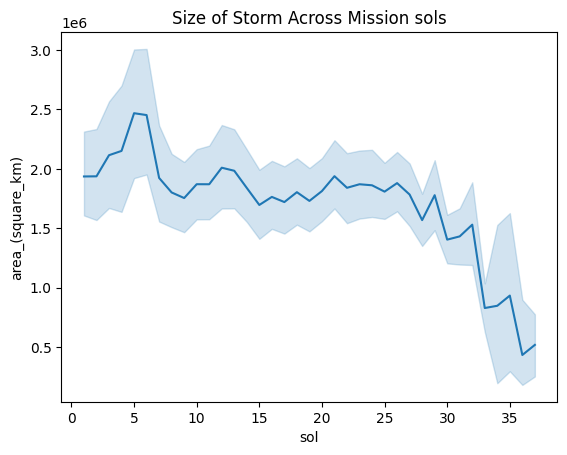

In [27]:
sns.lineplot(data=data, x='sol', y='area_(square_km)')
plt.title("Size of Storm Across Mission sols")

# Group Data Together by Storm

In [48]:
storms = data.sort_values(['mars_year', 'sol'], ascending=True).groupby(['member_id'])

In [49]:
# do to each group
storm = storms.get_group('s13_019')
storm

# to do 
# add "end" flag to predict if the next prediction will be the last
# add difference in size, centroid_longitude and centroid_latitude
# add ticker for number of sols existed thus far

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
14536,27,s13,15,341.03,-156.55,32.0,225112.34,s13_019,s13_02,36.6,27.7,75,no,False,[s13_019],storm_id_list_0,s13_019
14542,27,s13,16,341.55,-158.95,33.5,349838.06,s13_019,s13_02,38.6,28.7,75,no,False,[s13_019],storm_id_list_0,s13_019
14544,27,s13,17,342.07,-172.05,38.9,2410117.80,s13_019,s13_02,58.6,17.0,100,no,False,[s13_019],storm_id_list_0,s13_019
14546,27,s13,18,342.59,-158.65,47.1,1713580.90,s13_019,s13_02,55.7,36.5,50,no,False,[s13_019],storm_id_list_0,s13_019
14549,27,s13,19,343.11,-140.25,51.0,2100683.50,s13_019,s13_02,59.8,41.0,50,no,False,[s13_019],storm_id_list_0,s13_019


In [50]:
storm

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,minimum_latitude,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout
14536,27,s13,15,341.03,-156.55,32.0,225112.34,s13_019,s13_02,36.6,27.7,75,no,False,[s13_019],storm_id_list_0,s13_019
14542,27,s13,16,341.55,-158.95,33.5,349838.06,s13_019,s13_02,38.6,28.7,75,no,False,[s13_019],storm_id_list_0,s13_019
14544,27,s13,17,342.07,-172.05,38.9,2410117.80,s13_019,s13_02,58.6,17.0,100,no,False,[s13_019],storm_id_list_0,s13_019
14546,27,s13,18,342.59,-158.65,47.1,1713580.90,s13_019,s13_02,55.7,36.5,50,no,False,[s13_019],storm_id_list_0,s13_019
14549,27,s13,19,343.11,-140.25,51.0,2100683.50,s13_019,s13_02,59.8,41.0,50,no,False,[s13_019],storm_id_list_0,s13_019


In [54]:
# end flag

maximum_index = storm.index.max()
maximum_index
storm['end'] = storm.index.to_list()
storm['end'] = storm['end'].apply(lambda x: x == maximum_index)

/tmp/ipykernel_1616712/276900675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm['end'] = storm.index.to_list()
/tmp/ipykernel_1616712/276900675.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm['end'] = storm['end'].apply(lambda x: x == maximum_index)


In [55]:
storm[['centroid_longitude_diff', 'centroid_latitude_diff', 'area_(square_km)_diff']] = storm[['centroid_longitude', 'centroid_latitude', 'area_(square_km)']].diff().fillna(0)


/tmp/ipykernel_1616712/1126946126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm[['centroid_longitude_diff', 'centroid_latitude_diff', 'area_(square_km)_diff']] = storm[['centroid_longitude', 'centroid_latitude', 'area_(square_km)']].diff().fillna(0)
/tmp/ipykernel_1616712/1126946126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm[['centroid_longitude_diff', 'centroid_latitude_diff', 'area_(square_km)_diff']] = storm[['centroid_longitude', 'centroid_latitude', 'area_(square_km)']].diff(

In [56]:
storm

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,...,confidence_interval,missing_data,combined_storm,storm_ids,variable,storm_id_breakout,end,centroid_longitude_diff,centroid_latitude_diff,area_(square_km)_diff
14536,27,s13,15,341.03,-156.55,32.0,225112.34,s13_019,s13_02,36.6,...,75,no,False,[s13_019],storm_id_list_0,s13_019,False,0.0,0.0,0.00
14542,27,s13,16,341.55,-158.95,33.5,349838.06,s13_019,s13_02,38.6,...,75,no,False,[s13_019],storm_id_list_0,s13_019,False,-2.4,1.5,124725.72
14544,27,s13,17,342.07,-172.05,38.9,2410117.80,s13_019,s13_02,58.6,...,100,no,False,[s13_019],storm_id_list_0,s13_019,False,-13.1,5.4,2060279.74
14546,27,s13,18,342.59,-158.65,47.1,1713580.90,s13_019,s13_02,55.7,...,50,no,False,[s13_019],storm_id_list_0,s13_019,False,13.4,8.2,-696536.90
14549,27,s13,19,343.11,-140.25,51.0,2100683.50,s13_019,s13_02,59.8,...,50,no,False,[s13_019],storm_id_list_0,s13_019,True,18.4,3.9,387102.60


In [57]:
# number of sols thus far
storm['n_sols_exist'] = storm.reset_index().index

/tmp/ipykernel_1616712/2700179152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storm['n_sols_exist'] = storm.reset_index().index


In [58]:
storm

,mars_year,mission_subphase,sol,ls,centroid_longitude,centroid_latitude,area_(square_km),member_id,sequence_id,maximum_latitude,...,missing_data,combined_storm,storm_ids,variable,storm_id_breakout,end,centroid_longitude_diff,centroid_latitude_diff,area_(square_km)_diff,n_sols_exist
14536,27,s13,15,341.03,-156.55,32.0,225112.34,s13_019,s13_02,36.6,...,no,False,[s13_019],storm_id_list_0,s13_019,False,0.0,0.0,0.00,0
14542,27,s13,16,341.55,-158.95,33.5,349838.06,s13_019,s13_02,38.6,...,no,False,[s13_019],storm_id_list_0,s13_019,False,-2.4,1.5,124725.72,1
14544,27,s13,17,342.07,-172.05,38.9,2410117.80,s13_019,s13_02,58.6,...,no,False,[s13_019],storm_id_list_0,s13_019,False,-13.1,5.4,2060279.74,2
14546,27,s13,18,342.59,-158.65,47.1,1713580.90,s13_019,s13_02,55.7,...,no,False,[s13_019],storm_id_list_0,s13_019,False,13.4,8.2,-696536.90,3
14549,27,s13,19,343.11,-140.25,51.0,2100683.50,s13_019,s13_02,59.8,...,no,False,[s13_019],storm_id_list_0,s13_019,True,18.4,3.9,387102.60,4
